## Importing the data:

In [32]:
import pandas as pd
data = pd.read_csv('Salary_dataset.csv')                   #Importing the data
print(data.columns)                                        #to get the name of columns

#Removing the already present column which is acting like an index
data.drop("Unnamed: 0",axis=1,inplace=True)                
data

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')


,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


## Visualizing our data:

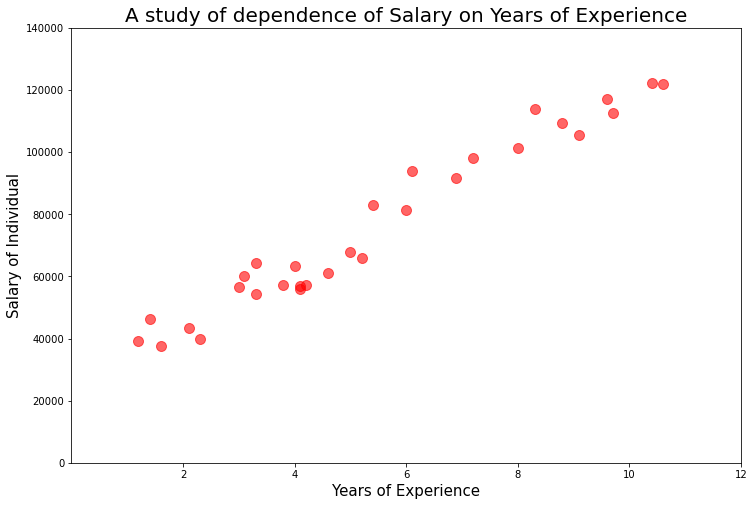

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(data["YearsExperience"],data["Salary"],alpha=0.6,s=100,color='red')
plt.xlim(0,12)
plt.ylim(0,140000)
plt.xticks([2,4,6,8,10,12])
plt.xlabel("Years of Experience", fontsize=15)
plt.ylabel("Salary of Individual",fontsize=15)
plt.title("A study of dependence of Salary on Years of Experience",fontsize=20)
plt.show()

## Finding the line of best fit:

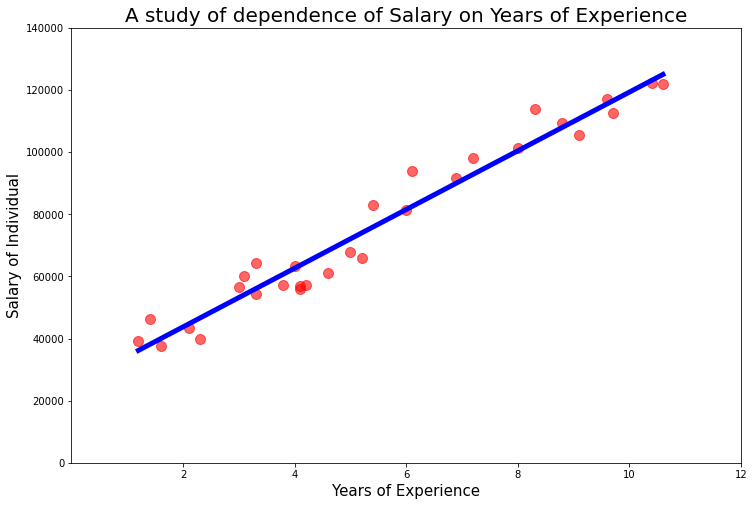

In [37]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

#Storing the required columns in a seperate dataframe for easy access
X= pd.DataFrame(data,columns=['YearsExperience'])
y= pd.DataFrame(data,columns=['Salary'])
lr.fit(X,y)

#Plotting the line of best fit along with the data points:
plt.figure(figsize=(12,8))
plt.scatter(data["YearsExperience"],data["Salary"],alpha=0.6,s=100,color='red')
plt.xlim(0,12)
plt.ylim(0,140000)
plt.xticks([2,4,6,8,10,12])
plt.xlabel("Years of Experience", fontsize=15)
plt.ylabel("Salary of Individual",fontsize=15)
plt.title("A study of dependence of Salary on Years of Experience",fontsize=20)
plt.plot(X,lr.predict(X),color='blue',linewidth=5)
plt.show()


In [42]:
print(lr.intercept_ , lr.coef_)
print(lr.score(X,y))
lr.predict([[11.5]])

[24848.20396652] [[9449.96232146]]
0.9569566641435086


array([[133522.77066326]])

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
x_train

,YearsExperience
28,10.4
24,8.8
12,4.1
0,1.2
4,2.3
16,5.2
5,3.0
13,4.2
11,4.1
22,8.0


In [46]:
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
lr.predict(x_test)

array([[115791.21011287],
       [ 71499.27809463],
       [102597.86866063],
       [ 75268.80422384],
       [ 55478.79204548],
       [ 60190.69970699]])

In [48]:
y_test

,Salary
27,112636.0
15,67939.0
23,113813.0
17,83089.0
8,64446.0
9,57190.0


In [49]:
lr.score(x_test,y_test)

0.9024461774180498